In [3]:
%matplotlib inline

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

device = None
if torch.cuda.is_available():
    # device = torch.device('cuda')
    device = torch.device('cpu')
else:
    device = torch.device('cpu')


x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], device=device).reshape(-1, 2)
y_train = torch.tensor([[1.0], [1.0], [1.0], [0.0]], device=device).reshape(-1, 1)

class NandOperatorModel:
    def __init__(self):
        self.W = torch.tensor([[0.0], [0.0]], device=device, requires_grad=True)
        self.b = torch.tensor([[0.0]], device=device, requires_grad=True)

    def logits(self, x1, x2):
        return ((x1 @ self.W[0]) + (x2 @ self.W[1]) + self.b).reshape(-1, 1)

    # Predictor
    def f(self, x1, x2):
        return torch.sigmoid(self.logits(x1.to(device), x2.to(device))).to(device)

    def loss(self, x1, x2, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x1, x2), y)

In [14]:
model = NandOperatorModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], 0.1)
for epoch in range(150_000):
    model.loss(x_train[:, 0].reshape(-1, 1),
               x_train[:, 1].reshape(-1, 1),
               y_train).backward() # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step

W = tensor([[-12.8828],
        [-12.8828]], requires_grad=True), b = tensor([[19.4942]], requires_grad=True), loss = tensor(0.0011, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


/home/olros/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


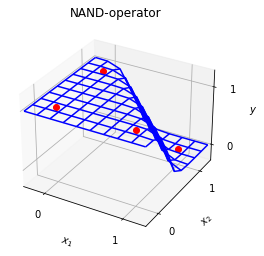

In [15]:
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train[:, 0].reshape(-1, 1),
                                    x_train[:, 1].reshape(-1, 1),
                                    y_train)))

# Visualize result
fig = plt.figure('Oppgave B')
plot = fig.add_subplot(111, projection='3d')
plt.title('NAND-operator')

# Hva gjør denne plottinga? Aner ikke
x1_grid, x2_grid = np.meshgrid(
    np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
y_grid = np.empty([10, 10], dtype=np.double)
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
        tenseX = torch.tensor(float(x1_grid[i, j])).reshape(-1, 1)
        tenseY = torch.tensor(float(x2_grid[i, j])).reshape(-1, 1)
        y_grid[i, j] = model.f(tenseX, tenseY)
plot_f = plot.plot_wireframe(x1_grid, x2_grid, y_grid, color="blue")

plot.plot(x_train[:, 0].squeeze(),
          x_train[:, 1].squeeze(),
          y_train[:, 0].squeeze(),
          'o',
          color="red")

plot.set_xlabel("$x_1$")
plot.set_ylabel("$x_2$")
plot.set_zlabel("$y$")
plot.set_xticks([0, 1])
plot.set_yticks([0, 1])
plot.set_zticks([0, 1])
plot.set_xlim(-0.25, 1.25)
plot.set_ylim(-0.25, 1.25)
plot.set_zlim(-0.25, 1.25)

plt.show()